In [5]:
from itertools import combinations
from os import listdir

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from constants import get_problem
from SALib.analyze import sobol
from SALib.util.results import ResultDict

In [6]:
input_dir: str = "outputs"

In [7]:
# load the measurement data
df_list = []
for file in listdir(input_dir):
    df_list.append(
        pd.read_csv(
            f"{input_dir}/{file}",
            index_col=0,
        )
    )
df = pd.concat(df_list)

In [8]:
# analyze the sensitivity
problem = get_problem()

arrested = sobol.analyze(problem, df["arrested"].values, print_to_console=True)
quiet = sobol.analyze(problem, df["quiet"].values, print_to_console=True)
active = sobol.analyze(problem, df["active"].values, print_to_console=True)

/home/wessel/Documents/external_repos/abm-assignment/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST   ST_conf
legitimacy        0.687508  0.025458
active_threshold  0.774558  0.027191
reversion_rate    0.823719  0.030796
prob_quiet        0.904513  0.027717
                        S1   S1_conf
legitimacy        0.032729  0.030740
active_threshold  0.027532  0.025878
reversion_rate    0.093648  0.030242
prob_quiet        0.112093  0.027847
                                          S2   S2_conf
(legitimacy, active_threshold)      0.187953  0.043182
(legitimacy, reversion_rate)        0.169606  0.045286
(legitimacy, prob_quiet)            0.227410  0.048763
(active_threshold, reversion_rate)  0.125588  0.035417
(active_threshold, prob_quiet)      0.169536  0.038233
(reversion_rate, prob_quiet)        0.023606  0.043087


/home/wessel/Documents/external_repos/abm-assignment/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST   ST_conf
legitimacy        0.686999  0.023868
active_threshold  0.774103  0.023680
reversion_rate    0.823356  0.021938
prob_quiet        0.902920  0.024895
                        S1   S1_conf
legitimacy        0.033136  0.031752
active_threshold  0.029551  0.029682
reversion_rate    0.094544  0.032546
prob_quiet        0.113350  0.031542
                                          S2   S2_conf
(legitimacy, active_threshold)      0.185858  0.044702
(legitimacy, reversion_rate)        0.169497  0.047161
(legitimacy, prob_quiet)            0.225497  0.049752
(active_threshold, reversion_rate)  0.122202  0.042139
(active_threshold, prob_quiet)      0.165833  0.045752
(reversion_rate, prob_quiet)        0.021965  0.047083


/home/wessel/Documents/external_repos/abm-assignment/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST   ST_conf
legitimacy        0.297054  0.488728
active_threshold  0.318912  0.533689
reversion_rate    0.346688  0.570593
prob_quiet        0.428413  0.682078
                        S1   S1_conf
legitimacy        0.013817  0.056916
active_threshold -0.004485  0.018735
reversion_rate    0.001257  0.020376
prob_quiet        0.002026  0.022353
                                          S2   S2_conf
(legitimacy, active_threshold)     -0.005509  0.057661
(legitimacy, reversion_rate)        0.030076  0.100423
(legitimacy, prob_quiet)            0.029934  0.078904
(active_threshold, reversion_rate)  0.012285  0.036092
(active_threshold, prob_quiet)      0.003798  0.019937
(reversion_rate, prob_quiet)       -0.000521  0.026347


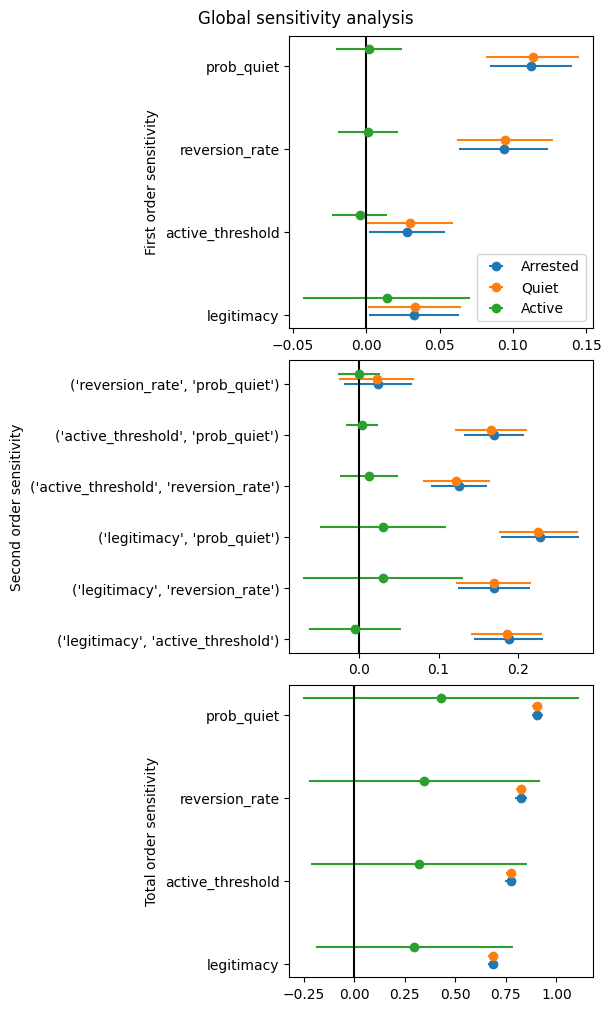

In [10]:
def plot_all_indices(analyses: dict[str, ResultDict], params, title=""):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        analyses (dict[str, ResultDict]): dictionary mapping the name of the analysis to
            dictionaries {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the names of the parameters in the analyses
        title (str): title for the plot
    """
    single_names = params
    second_names = list(combinations(params, 2))

    fig, axes = plt.subplots(3, 1, figsize=(6, 10), layout="compressed")

    for nr, analysis in enumerate(analyses.items()):
        name, s = analysis
        for i in ["1", "2", "T"]:
            # first order
            if i == "1":
                indices = s["S" + i]
                errors = s["S" + i + "_conf"]
                axes[0].errorbar(
                    indices,
                    np.arange(len(indices)) + nr * 0.1,
                    xerr=errors,
                    linestyle="None",
                    marker="o",
                    label=name,
                )
            # second order
            elif i == "2":
                flattened = s["S" + i].flatten()
                indices = flattened[~np.isnan(flattened)]

                flattened = s["S" + i + "_conf"].flatten()
                errors = flattened[~np.isnan(flattened)]
                axes[1].errorbar(
                    indices,
                    np.arange(len(indices)) + nr * 0.1,
                    xerr=errors,
                    linestyle="None",
                    marker="o",
                    label=name,
                )
            # total order
            else:
                indices = s["S" + i]
                errors = s["S" + i + "_conf"]
                axes[2].errorbar(
                    indices,
                    np.arange(len(indices)) + nr * 0.1,
                    xerr=errors,
                    linestyle="None",
                    marker="o",
                    label=name,
                )

    axes[0].set_yticks(range(len(single_names)), single_names)
    axes[1].set_yticks(range(len(second_names)), second_names)
    axes[2].set_yticks(range(len(single_names)), single_names)

    axes[0].axvline(0, c="k")
    axes[1].axvline(0, c="k")
    axes[2].axvline(0, c="k")

    axes[0].set_ylabel("First order sensitivity")
    axes[1].set_ylabel("Second order sensitivity")
    axes[2].set_ylabel("Total order sensitivity")

    axes[0].legend()
    fig.suptitle(title)


plot_all_indices(
    {"Arrested": arrested, "Quiet": quiet, "Active": active},
    problem["names"],
    "Global sensitivity analysis",
)
plt.show()